In [79]:
import numpy as np

X = np.array([10, 20, 10, 1]) 

K = np.array([[800, 0, 0],
              [0, 800, 0],
              [0,   0, 1]])

print("Coordinates of the 3D point:\n", X)
print("Intrinsic matrix of the camera:\n", K)

Coordinates of the 3D point:
 [10 20 10  1]
Intrinsic matrix of the camera:
 [[800   0   0]
 [  0 800   0]
 [  0   0   1]]


In [80]:
R1 = np.eye(3)
t1 = np.zeros((3,1))
P1 = K @ np.hstack((R1, t1))

R2 = np.eye(3)
t2 = np.array([[1],[-3],[0]])
P2 = K @ np.hstack((R2, -t2))

print("Projection matrix for camera 1:\n", P1)
print("Projection matrix for camera 2:\n", P2)

Projection matrix for camera 1:
 [[800.   0.   0.   0.]
 [  0. 800.   0.   0.]
 [  0.   0.   1.   0.]]
Projection matrix for camera 2:
 [[ 8.0e+02  0.0e+00  0.0e+00 -8.0e+02]
 [ 0.0e+00  8.0e+02  0.0e+00  2.4e+03]
 [ 0.0e+00  0.0e+00  1.0e+00  0.0e+00]]


In [81]:
def project(P, X):
    x = P @ X
    return x[:2] / x[2]

In [82]:
x1 = project(P1, X) 
x2 = project(P2, X)
print("Pixel in Cam1:", x1)
print("Pixel in Cam2:", x2)

Pixel in Cam1: [ 800. 1600.]
Pixel in Cam2: [ 720. 1840.]


In [83]:
def hat(v): 
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

In [84]:
R = R2 @ R1.T
t = t2
E = hat(t.flatten()) @ R
print("Essential matrix:\n", E)

Essential matrix:
 [[ 0.  0. -3.]
 [ 0.  0. -1.]
 [ 3.  1.  0.]]


In [85]:
p1 = np.array([x1[0], x1[1], 1])
l2 = E @ p1
print("Epipolar line in Cam2:", l2)

p2 = np.array([x2[0], x2[1], 1])
val = p2 @ l2
print("Check p2 lies on line:", val)

Epipolar line in Cam2: [-3.e+00 -1.e+00  4.e+03]
Check p2 lies on line: 0.0


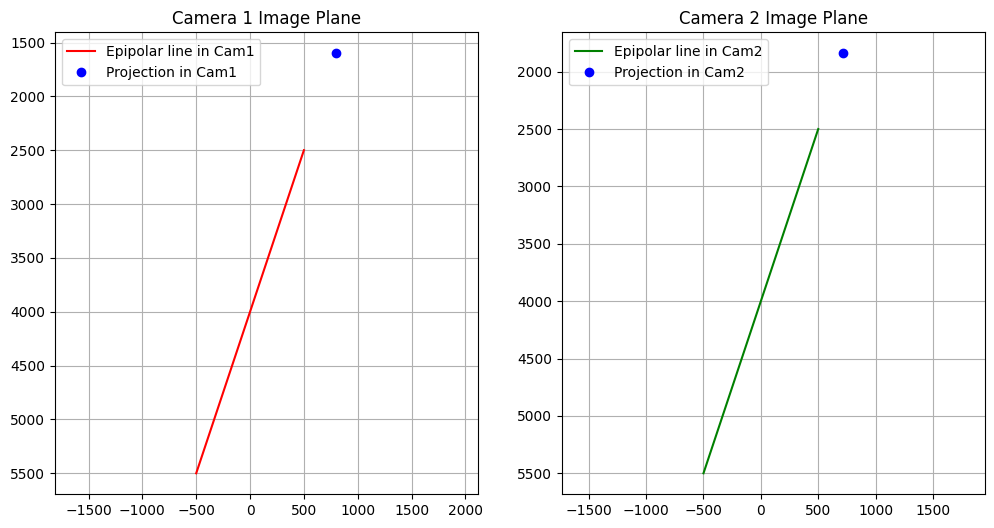

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Compute epipolar lines
p1 = np.array([x1[0], x1[1], 1])
p2 = np.array([x2[0], x2[1], 1])

l2 = E @ p1      # line in cam2 from point in cam1
l1 = E.T @ p2    # line in cam1 from point in cam2

# Function to compute line points (for plotting)
def line_points(l, x_range=(-500, 500)):
    a, b, c = l
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    if abs(b) > 1e-8:
        y_vals = (-a * x_vals - c) / b
    else:  # vertical line
        x_vals = np.full_like(x_vals, -c / a)
        y_vals = np.linspace(-500, 500, 1000)
    return x_vals, y_vals

# Get plotting values
x_vals1, y_vals1 = line_points(l1)
x_vals2, y_vals2 = line_points(l2)

# ---- Plot both image planes side by side ----
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Cam1
axes[0].plot(x_vals1, y_vals1, 'r-', label="Epipolar line in Cam1")
axes[0].plot(x1[0], x1[1], 'bo', label="Projection in Cam1")
axes[0].set_title("Camera 1 Image Plane")
axes[0].invert_yaxis()
axes[0].axis("equal")
axes[0].grid(True)
axes[0].legend()

# Cam2
axes[1].plot(x_vals2, y_vals2, 'g-', label="Epipolar line in Cam2")
axes[1].plot(x2[0], x2[1], 'bo', label="Projection in Cam2")
axes[1].set_title("Camera 2 Image Plane")
axes[1].invert_yaxis()
axes[1].axis("equal")
axes[1].grid(True)
axes[1].legend()

plt.show()
